17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset size: (50000, 2)
Accuracy: 0.8916

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4912
           1       0.89      0.90      0.89      5088

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



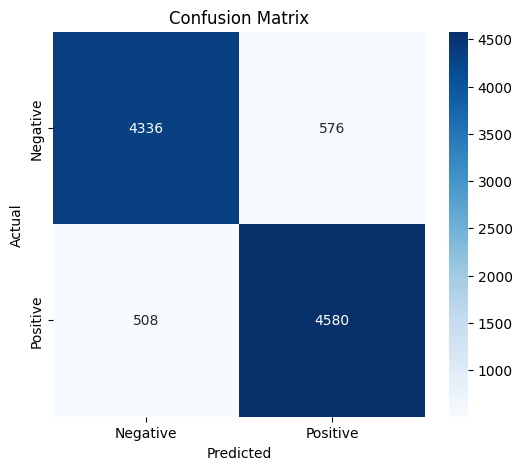

C:\Users\user\AppData\Local\Temp\ipykernel_12456\2378823456.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


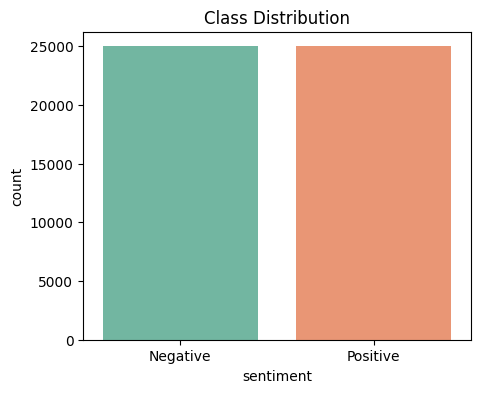

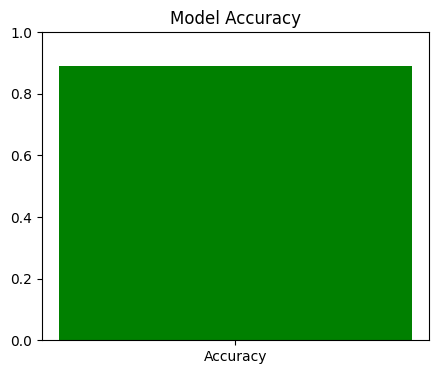


Sample Predictions: [1 0]


In [2]:
# Sentiment Analysis on IMDB Movie Reviews
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# ------------------ LOAD DATA ------------------ #
# Using Keras built-in IMDB dataset
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset (only top 10,000 words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Convert word indices back to text
word_index = imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

def decode_review(text_ids):
    return " ".join([index_word.get(i, "?") for i in text_ids])

reviews_train = [decode_review(x) for x in X_train]
reviews_test = [decode_review(x) for x in X_test]

# Convert to pandas DataFrame
df_train = pd.DataFrame({"review": reviews_train, "sentiment": y_train})
df_test = pd.DataFrame({"review": reviews_test, "sentiment": y_test})
df = pd.concat([df_train, df_test]).reset_index(drop=True)

print("Dataset size:", df.shape)

# ------------------ PREPROCESS ------------------ #
X = df["review"]
y = df["sentiment"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)

# ------------------ MODEL ------------------ #
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# ------------------ EVALUATION ------------------ #
y_pred = model.predict(X_valid_tfidf)

print("Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# ------------------ VISUALIZATION ------------------ #
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Class Distribution")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.show()

# Accuracy comparison
plt.figure(figsize=(5, 4))
plt.bar(["Accuracy"], [accuracy_score(y_valid, y_pred)], color="green")
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.show()

# ------------------ CUSTOM PREDICTION ------------------ #
sample = ["This movie was mind-blowing, loved every second!",
          "The worst acting and plot I have ever seen."]
sample_tfidf = vectorizer.transform(sample)
print("\nSample Predictions:", model.predict(sample_tfidf))
